In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Loading the dataset
file_path = 'banana_quality.csv' 
banana_data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(banana_data.info())
print(banana_data.head())

# Check for missing values
print("\nMissing Values:")
print(banana_data.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB
None
       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity  \
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290   
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325   
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322   
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862   
4 


Classification Report for Banana Quality:
              precision    recall  f1-score   support

       False       0.98      0.97      0.97       781
        True       0.97      0.98      0.98       819

    accuracy                           0.97      1600
   macro avg       0.98      0.97      0.97      1600
weighted avg       0.98      0.97      0.97      1600



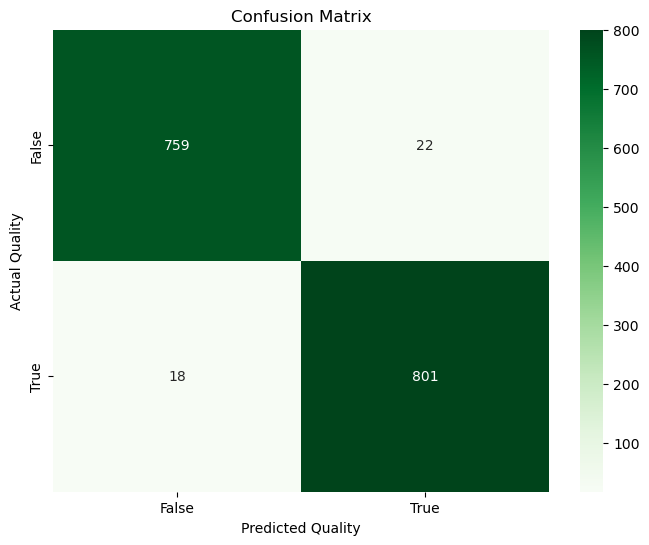

In [34]:


# Handle missing values 
categorical_columns = banana_data.select_dtypes(include=['object']).columns
numerical_columns = banana_data.select_dtypes(include=['number']).columns

# Fill missing values for numerical columns
banana_data[numerical_columns] = banana_data[numerical_columns].fillna(banana_data[numerical_columns].median())

# Fill missing values for categorical columns with mode
for col in categorical_columns:
    banana_data[col].fillna(banana_data[col].mode()[0], inplace=True)

# Encode categorical features 
banana_data = pd.get_dummies(banana_data, columns=categorical_columns, drop_first=True)

# Ensure the target column exists in the dataset
target_column = 'Quality_Good' 
if target_column not in banana_data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset.")

# Split dataset into features and target
X = banana_data.drop(columns=[target_column])
y = banana_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report for Banana Quality:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.show()




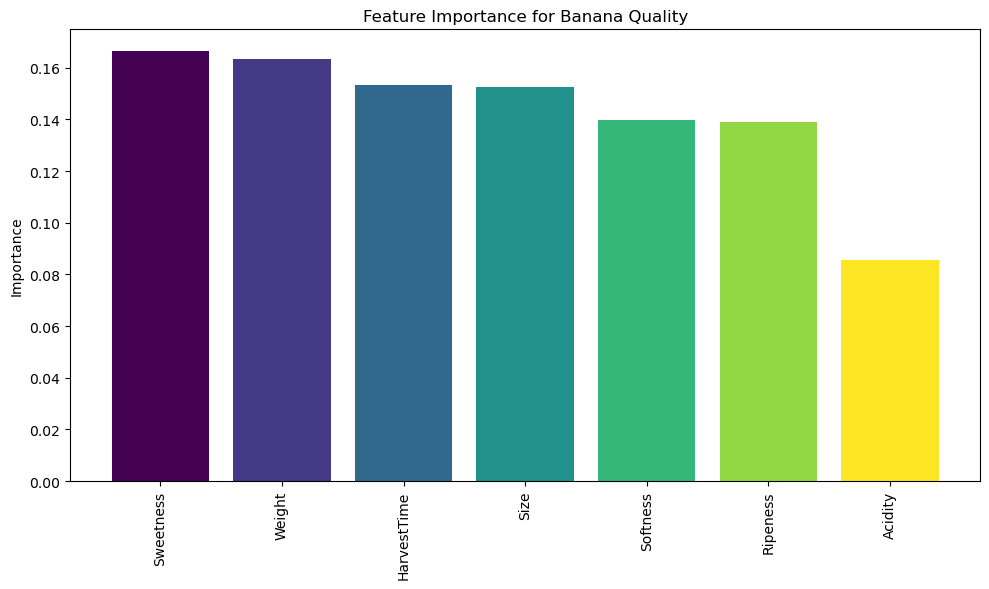

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance calculation
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Create a colormap
cmap = plt.get_cmap('viridis')  # You can change the colormap here for different effects
colors = cmap(np.linspace(0, 1, X.shape[1]))

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importance for Banana Quality")
bars = plt.bar(range(X.shape[1]), importances[indices], align="center", color=colors)

# Add feature names as xticks
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)

# Add labels and tighten layout
plt.ylabel("Importance")
plt.tight_layout()

# Show plot
plt.show()
